<a href="https://colab.research.google.com/github/Jacqueline45/EE559_Project/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/EE559_Project-main.zip

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [ ]:
fires_train = pd.read_csv("/content/EE559_Project-main/datasets/algerian_fires_train.csv")
fires_test = pd.read_csv("/content/EE559_Project-main/datasets/algerian_fires_test.csv")

fires_1 = fires_train.iloc[:,1:,]
firestst_1 = fires_test.iloc[:,1:,]

fires_trainx = fires_train.iloc[:,1:-1]
fires_trainy = fires_train.iloc[:,-1]
fires_testx = fires_test.iloc[:,1:-1]
fires_testy = fires_test.iloc[:,-1]

scalar = MinMaxScaler()

fires = scalar.fit_transform(fires_trainx)
firestst = scalar.fit_transform(fires_testx)

In [ ]:
X = fires_train.drop(['Classes','Date'], axis = 1).values
X

array([[ 1.89523987e+01,  4.38558646e+01,  1.22925358e+01, ...,
         2.85435729e+01,  4.87245655e-01,  6.22546120e+00],
       [ 3.44986100e+01,  4.62304410e+01,  1.48382107e+01, ...,
        -1.00076357e+01, -1.47215814e+00,  2.26810354e+00],
       [ 1.52586647e+01,  5.70842791e+01,  1.09686959e+01, ...,
        -1.37745877e+01,  1.33873657e+00, -3.32790768e+00],
       ...,
       [ 4.47509661e+01,  5.84287525e+01,  2.16879391e+01, ...,
         1.76118476e+02, -2.71473975e-01,  3.03402673e+01],
       [ 3.32982696e+01,  7.95583286e+01,  2.04642690e+01, ...,
        -1.12980333e+01,  3.57983620e-02,  4.74474070e+00],
       [ 3.27622955e+01,  8.43226855e+01,  2.16539323e+01, ...,
         1.65945211e+02,  1.04402990e+01,  3.59865523e+01]])

In [ ]:
print(fires_trainx.head())
print(fires_trainx.shape)
print(fires_trainx.columns)

   Temperature          RH         Ws       Rain       FFMC       DMC  \
0    18.952399   43.855865  12.292536  -0.340306  73.063752 -2.371083   
1    34.498610   46.230441  14.838211   0.939652  56.027977  0.441002   
2    15.258665   57.084279  10.968696   1.397913  33.114404  3.389994   
3    24.847936   99.910000  17.924025   3.958666  26.148986  5.179630   
4    19.381227  104.398680  23.740540  13.394723  28.658020 -2.247164   

          DC       ISI       BUI  
0  28.543573  0.487246  6.225461  
1 -10.007636 -1.472158  2.268104  
2 -13.774588  1.338737 -3.327908  
3  -1.392789 -0.755090  0.131303  
4  -3.432689  0.558249 -1.928471  
(184, 9)
Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI'], dtype='object')


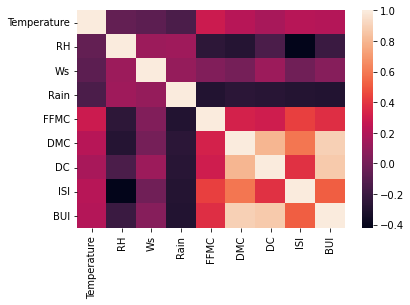

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr=fires_trainx.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

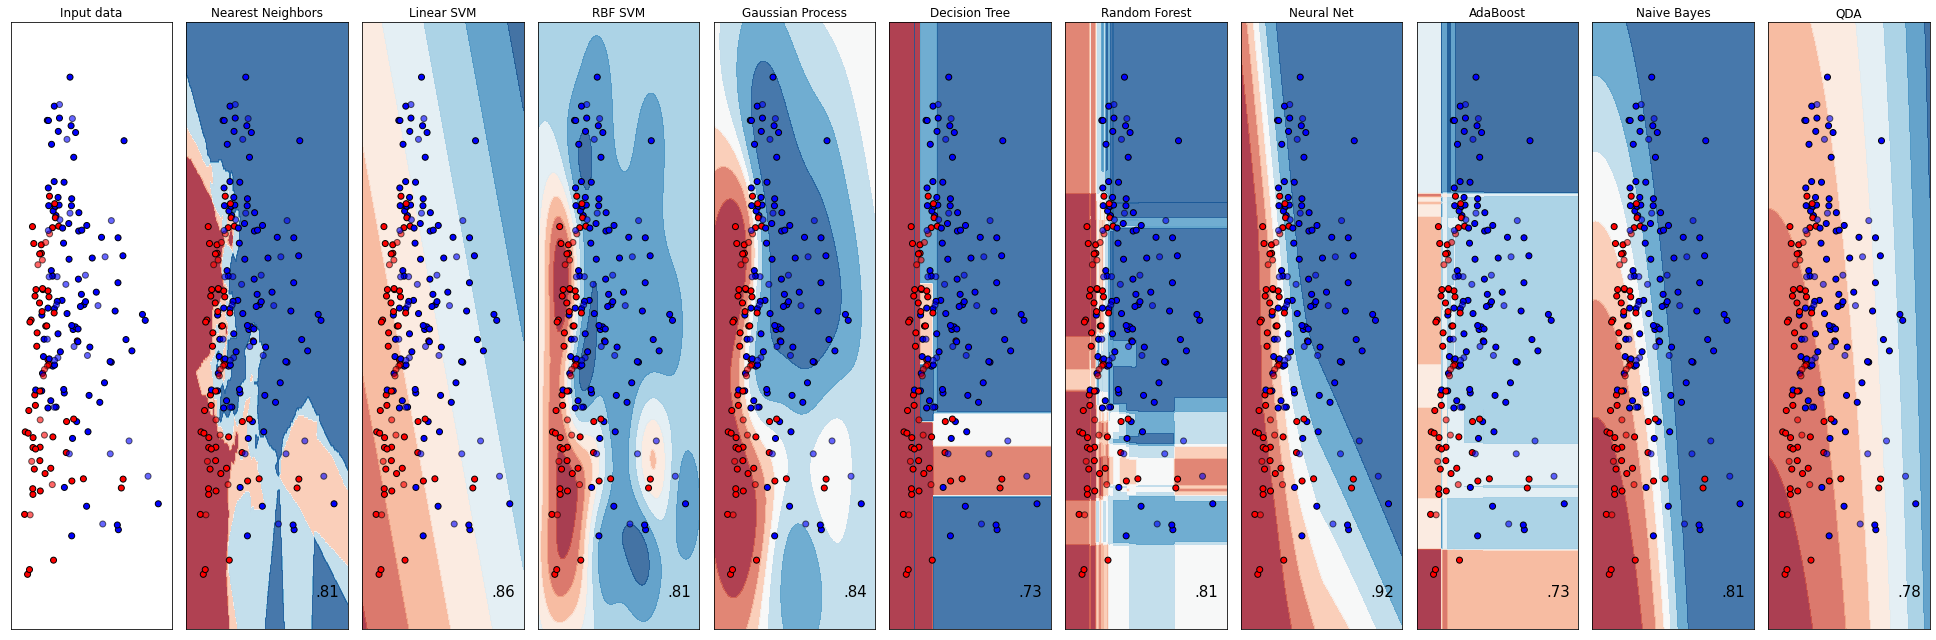

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X = fires_train.drop(['Classes','Date'], axis = 1).values
pca = PCA(n_components=2,svd_solver='full')
X = pca.fit_transform(X)
y = fires_train['Classes']

rng = np.random.RandomState(2)

datasets = [fires_1]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):

    X = StandardScaler().fit_transform(X)
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=.2, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

  #

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
      ax.set_title("Input data")

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1


    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_val, y_val)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
# Preprocessing :
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from itertools import product

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
trainedmodel = LogisticRegression().fit(fires_trainx,fires_trainy)
predictions =trainedmodel.predict(fires_testx)
print(confusion_matrix(fires_testy,predictions))
print(classification_report(fires_testy,predictions))

[[33  4]
 [ 4 19]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        37
           1       0.83      0.83      0.83        23

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



In [ ]:
trainedforest = RandomForestClassifier(n_estimators=700).fit(fires_trainx,fires_trainy)
predictionforest = trainedforest.predict(fires_testx)
print(confusion_matrix(fires_testy,predictionforest))
print(classification_report(fires_testy,predictionforest))

[[33  4]
 [ 4 19]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        37
           1       0.83      0.83      0.83        23

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



In [ ]:
trainedtree = tree.DecisionTreeClassifier().fit(fires_trainx,fires_trainy)
predictionstree = trainedtree.predict(fires_testx)
print(confusion_matrix(fires_testy,predictionstree))
print(classification_report(fires_testy,predictionstree))

[[34  3]
 [ 4 19]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        37
           1       0.86      0.83      0.84        23

    accuracy                           0.88        60
   macro avg       0.88      0.87      0.88        60
weighted avg       0.88      0.88      0.88        60



In [ ]:
trainednb = GaussianNB().fit(fires_trainx,fires_trainy)
predictionnb = trainednb.predict(fires_testx)
print(confusion_matrix(fires_testy,predictionnb))
print(classification_report(fires_testy,predictionnb))

[[35  2]
 [ 6 17]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        37
           1       0.89      0.74      0.81        23

    accuracy                           0.87        60
   macro avg       0.87      0.84      0.85        60
weighted avg       0.87      0.87      0.86        60



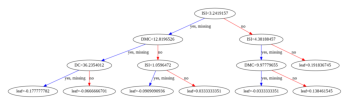

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
model = XGBClassifier()

# Train
model.fit(fires_trainx,fires_trainy)

plot_tree(model)
# plt.figure(figsize = (27,9))
plt.show()

In [ ]:
pca = PCA(n_components=2,svd_solver='full')
X_pca = pca.fit_transform(X)
# print(pca.explained_variance_)

X_reduced, X_test_reduced, Y_Train, Y_Test = train_test_split(X_pca, y, test_size = 0.30, random_state = 101)

trainednb = GaussianNB().fit(X_reduced, Y_Train)
trainedsvm = svm.LinearSVC().fit(X_reduced, Y_Train)
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_reduced,Y_Train)
trainedmodel = LogisticRegression().fit(X_reduced,Y_Train)

print('Naive Bayes')
predictionnb = trainednb.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

print('SVM')
predictionsvm = trainedsvm.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

print('Random Forest')
predictionforest = trainedforest.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

print('Logistic Regression')
predictions =trainedmodel.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

Naive Bayes
[[17  3]
 [ 7 29]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.91      0.81      0.85        36

    accuracy                           0.82        56
   macro avg       0.81      0.83      0.81        56
weighted avg       0.84      0.82      0.82        56

SVM
[[17  3]
 [ 7 29]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.91      0.81      0.85        36

    accuracy                           0.82        56
   macro avg       0.81      0.83      0.81        56
weighted avg       0.84      0.82      0.82        56

Random Forest
[[16  4]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.89      0.94      0.92        36

    accuracy                           0.89        56
   macro avg       0.89      0.87      0.

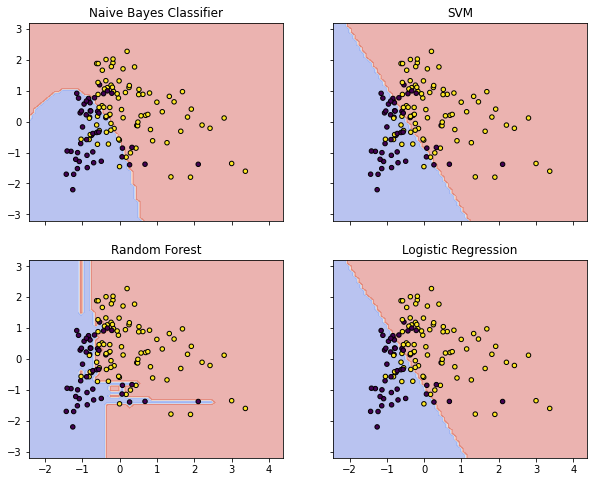

In [ ]:
reduced_data = X_reduced

trainednb = GaussianNB().fit(reduced_data, Y_Train)
trainedsvm = svm.LinearSVC().fit(reduced_data, Y_Train)
trainedforest = RandomForestClassifier(n_estimators=700).fit(reduced_data,Y_Train)
trainedmodel = LogisticRegression().fit(reduced_data,Y_Train)

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [trainednb, trainedsvm, trainedforest, trainedmodel],
                        ['Naive Bayes Classifier', 'SVM',
                         'Random Forest', 'Logistic Regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    

    axarr[idx[0], idx[1]].contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(reduced_data[:, 0], reduced_data[:, 1], c=Y_Train,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

**Polynomial Expansion:**
generate a new feature set consisting of all polynomial combinations of the features with degree less than or equal to the specified degree

In [ ]:
# create polynomial combinations of feature 'ISI','DMC' with degree 2
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2,include_bias=False).fit(fires_1[['ISI','DMC']])
tmp = pf.transform(fires_1[['ISI','DMC']])
fires_1_copy = pd.DataFrame(tmp,columns=pf.get_feature_names(['ISI','DMC']))
print(fires_1_copy.head(6))

        ISI       DMC     ISI^2   ISI DMC      DMC^2
0  0.487246 -2.371083  0.237408 -1.155300   5.622032
1 -1.472158  0.441002  2.167250 -0.649225   0.194483
2  1.338737  3.389994  1.792216  4.538309  11.492059
3 -0.755090  5.179630  0.570161 -3.911089  26.828571
4  0.558249 -2.247164  0.311642 -1.254477   5.049746
5 -0.182703  5.110650  0.033380 -0.933729  26.118748


In [ ]:
# create polynomial combinations of feature 
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2,include_bias=False).fit(fires_1[['Temperature','Ws','RH','Rain',	'FFMC',	'DMC',	'DC',	'ISI',	'BUI' ]])
tmp = pf.transform(fires_1[['Temperature','Ws','RH','Rain',	'FFMC',	'DMC',	'DC',	'ISI',	'BUI']])
fires_1_copy = pd.DataFrame(tmp,columns=pf.get_feature_names(['Temperature','Ws','RH','Rain',	'FFMC',	'DMC',	'DC',	'ISI',	'BUI']))
print(fires_1_copy.head(6))
print(fires_1_copy.shape)

pf = PolynomialFeatures(degree=2,include_bias=False).fit(firestst_1[['Temperature','Ws','RH','Rain',	'FFMC',	'DMC',	'DC',	'ISI',	'BUI' ]])
tmp = pf.transform(firestst_1[['Temperature','Ws','RH','Rain',	'FFMC',	'DMC',	'DC',	'ISI',	'BUI']])
firestst_1_copy = pd.DataFrame(tmp,columns=pf.get_feature_names(['Temperature','Ws','RH','Rain',	'FFMC',	'DMC',	'DC',	'ISI',	'BUI']))
print(fires_1_copy.head(6))
print(firestst_1_copy.head(6))
print(fires_1_copy.shape)
print(firestst_1_copy.shape)


fires_1_copy.to_csv(r'/content/EE559_Project-main/datasets/train_addfeatall.csv', index = False)
firestst_1_copy.to_csv(r'/content/EE559_Project-main/datasets/test_addfeatall.csv', index = False)


   Temperature         Ws          RH       Rain       FFMC       DMC  \
0    18.952399  12.292536   43.855865  -0.340306  73.063752 -2.371083   
1    34.498610  14.838211   46.230441   0.939652  56.027977  0.441002   
2    15.258665  10.968696   57.084279   1.397913  33.114404  3.389994   
3    24.847936  17.924025   99.910000   3.958666  26.148986  5.179630   
4    19.381227  23.740540  104.398680  13.394723  28.658020 -2.247164   
5    41.100323  17.605822   72.071701   2.046936  71.234188  5.110650   

          DC       ISI       BUI  Temperature^2  ...      DMC^2      DMC DC  \
0  28.543573  0.487246  6.225461     359.193418  ...   5.622032  -67.679166   
1 -10.007636 -1.472158  2.268104    1190.154093  ...   0.194483   -4.413386   
2 -13.774588  1.338737 -3.327908     232.826848  ...  11.492059  -46.695769   
3  -1.392789 -0.755090  0.131303     617.419915  ...  26.828571   -7.214130   
4  -3.432689  0.558249 -1.928471     375.631972  ...   5.049746    7.713815   
5  29.392823 -

In [ ]:
array = fires_1_copy.values
X = array[:,0:,]
Y = fires_trainy
X.shape

(184, 54)

In [ ]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA

path = r'/content/EE559_Project-main/datasets/train_addfeatall.csv'

df = pd.read_csv(path)

from sklearn.decomposition import PCA
pca = PCA(n_components=None)
fit = pca.fit(X)

print("Explanin Variance Ratio %s:",fit.explained_variance_ratio_)
print(fit.components_)

Explanin Variance Ratio %s: [7.84818514e-01 1.04584689e-01 6.00352790e-02 1.52814254e-02
 1.24216152e-02 6.78715381e-03 6.63144387e-03 1.93446510e-03
 1.73898569e-03 1.68444259e-03 8.79705616e-04 8.53365685e-04
 6.96997560e-04 3.58758654e-04 2.87697156e-04 2.41174936e-04
 1.85272038e-04 1.46861540e-04 8.44224692e-05 6.99343222e-05
 6.53046390e-05 5.14278165e-05 4.67347454e-05 2.22586345e-05
 2.06298876e-05 1.36722707e-05 1.06745818e-05 8.79569009e-06
 7.18336822e-06 6.04486955e-06 5.76381777e-06 5.21393264e-06
 2.89619577e-06 2.79040891e-06 2.27086201e-06 1.69725027e-06
 1.56679035e-06 7.84728871e-07 5.55992632e-07 5.23306090e-07
 4.35312370e-07 2.24767493e-07 1.21754056e-07 9.53637329e-08
 4.48157273e-08 3.98584073e-08 2.02107379e-08 1.22267038e-08
 5.56534971e-09 3.57987785e-09 1.45756484e-09 1.27719836e-09
 5.58976065e-10 5.26354728e-11]
[[ 1.34716734e-04  5.58252343e-05 -1.48931822e-04 ...  1.33368379e-03
   9.20408887e-03  6.33178846e-02]
 [-5.81493344e-04 -2.82448360e-05  1.20771

In [ ]:
pca = PCA(n_components=18)

fit = pca.fit(X)
print("Explain Variance Ratio %s:",fit.explained_variance_ratio_)



Explain Variance Ratio %s: [7.84818514e-01 1.04584689e-01 6.00352790e-02 1.52814254e-02
 1.24216152e-02 6.78715381e-03 6.63144387e-03 1.93446510e-03
 1.73898569e-03 1.68444259e-03 8.79705616e-04 8.53365685e-04
 6.96997560e-04 3.58758654e-04 2.87697156e-04 2.41174936e-04
 1.85272038e-04 1.46861540e-04]


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

model.fit(X,Y)

print(model.feature_importances_)

[0.00613343 0.00462958 0.0078362  0.01431877 0.01184063 0.03119388
 0.01889261 0.05834637 0.01305447 0.00530856 0.00605328 0.00425162
 0.0053161  0.0180643  0.01930979 0.0202148  0.053779   0.02036865
 0.00464961 0.00416863 0.01104267 0.00527748 0.01000835 0.00809404
 0.04630185 0.01881599 0.0063046  0.01456374 0.00533018 0.01001655
 0.00807034 0.05811168 0.00520132 0.00823433 0.00903435 0.00438218
 0.00539535 0.00806186 0.00496423 0.01491088 0.02358236 0.016798
 0.05765355 0.0176176  0.02581981 0.00621093 0.05230502 0.01860709
 0.01144714 0.06232337 0.01155739 0.03558957 0.05204827 0.01858761]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components=18, random_state=42)
pca.fit(X_train)

PCA(n_components=18, random_state=42)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((147, 18), (37, 18))

In [ ]:
%%time

def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))


run_randomForest(X_train_pca, X_test_pca, y_train, y_test)

run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.918918918918919
Accuracy on test set: 
0.9459459459459459
CPU times: user 462 ms, sys: 66.9 ms, total: 529 ms
Wall time: 687 ms


In [ ]:
for component in range(1,30):
    pca = PCA(n_components=component, random_state=42)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print('Selected Components: ', component)
    run_randomForest(X_train_pca, X_test_pca, y_train, y_test)
    print()

Selected Components:  1
Accuracy on test set: 
0.7297297297297297

Selected Components:  2
Accuracy on test set: 
0.7837837837837838

Selected Components:  3
Accuracy on test set: 
0.7837837837837838

Selected Components:  4
Accuracy on test set: 
0.918918918918919

Selected Components:  5
Accuracy on test set: 
0.8918918918918919

Selected Components:  6
Accuracy on test set: 
0.8918918918918919

Selected Components:  7
Accuracy on test set: 
0.8918918918918919

Selected Components:  8
Accuracy on test set: 
0.8648648648648649

Selected Components:  9
Accuracy on test set: 
0.8918918918918919

Selected Components:  10
Accuracy on test set: 
0.8378378378378378

Selected Components:  11
Accuracy on test set: 
0.8648648648648649

Selected Components:  12
Accuracy on test set: 
0.918918918918919

Selected Components:  13
Accuracy on test set: 
0.8918918918918919

Selected Components:  14
Accuracy on test set: 
0.8378378378378378

Selected Components:  15
Accuracy on test set: 
0.891891891

In [ ]:

cols=['Classes']
new_df=( fires_train.groupby(['Classes'],as_index=False)[cols]
           .agg(list)
           .reindex(columns=fires_train.columns) )
print(new_df)

   Date  Temperature  RH  Ws  Rain  FFMC  DMC  DC  ISI  BUI  \
0   NaN          NaN NaN NaN   NaN   NaN  NaN NaN  NaN  NaN   
1   NaN          NaN NaN NaN   NaN   NaN  NaN NaN  NaN  NaN   

                                             Classes  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  


In [ ]:
np.set_printoptions(threshold=30)

print('Feature set data [shape: '+str(fires_1_copy.shape)+']')
print(np.round(fires_1_copy, 2), '\n')
print('Feature names:')
print(np.array(fires_1_copy.columns), '\n')
print('Predictor Class label data [shape: '+str(fires_trainy.shape)+']')
print(new_df, '\n')



print('Predictor name:', np.array(new_df.columns))

np.set_printoptions(threshold=30)

Feature set data [shape: (184, 54)]
     Temperature     Ws      RH   Rain   FFMC    DMC      DC    ISI    BUI  \
0          18.95  12.29   43.86  -0.34  73.06  -2.37   28.54   0.49   6.23   
1          34.50  14.84   46.23   0.94  56.03   0.44  -10.01  -1.47   2.27   
2          15.26  10.97   57.08   1.40  33.11   3.39  -13.77   1.34  -3.33   
3          24.85  17.92   99.91   3.96  26.15   5.18   -1.39  -0.76   0.13   
4          19.38  23.74  104.40  13.39  28.66  -2.25   -3.43   0.56  -1.93   
..           ...    ...     ...    ...    ...    ...     ...    ...    ...   
179        28.45  15.20   57.13  -0.16  71.45  57.13  239.29  11.27  68.68   
180        26.68  17.05   73.62   0.13  61.23  18.99  170.97   9.50  39.28   
181        44.75  21.69   58.43   1.00  62.92  27.59  176.12  -0.27  30.34   
182        33.30  20.46   79.56  17.02  47.24   6.04  -11.30   0.04   4.74   
183        32.76  21.65   84.32  -0.21  67.29  33.60  165.95  10.44  35.99   

     Temperature^2  ...    

Text(0, 0.5, 'Cumulative explained variance')

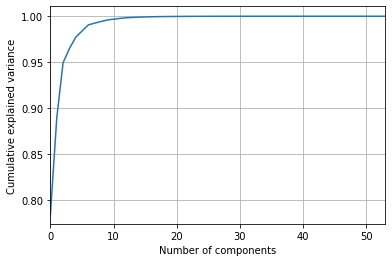

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,53,1)
plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
from sklearn.feature_selection import RFE

lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=20, step=1)
rfe.fit(fires_1_copy, fires_trainy)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

Gradient boost + Logistic Regression Feature encode

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,  roc_auc_score

gbdt = GradientBoostingClassifier(n_estimators=20)
one_hot = OneHotEncoder()

X_train = fires_1[[ 'ISI', 'DMC', 'FFMC', 'DC']].fillna(0)
X_test = firestst_1[[  'ISI', 'DMC', 'FFMC', 'DC']].fillna(0)

gbdt.fit(X_train, fires_trainy)

X_leaf_index = gbdt.apply(X_train)[:, :, 0]  # apply return the node index on each tree 
print("sample's belonging node of each base tree \n'",X_leaf_index)
# fit one-hot encoder
one_hot.fit(X_leaf_index)   
X_one_hot = one_hot.transform(X_leaf_index)  


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=1000)

lr.fit(X_one_hot,fires_trainy)
y_pred = lr.predict_proba(
    one_hot.transform(gbdt.apply(X_test)[:, :, 0]))[:,1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(fires_testy, y_pred)
print("AUC for GBDT derived feature + LR：", roc_auc_score(fires_testy, y_pred))

sample's belonging node of each base tree 
' [[ 3.  3.  3. ...  3.  3.  4.]
 [ 3.  3.  3. ...  3.  3.  4.]
 [ 3.  3.  3. ...  3.  3.  3.]
 ...
 [ 6.  6.  6. ...  7.  4.  4.]
 [ 3.  3.  3. ...  3.  3.  4.]
 [12. 12. 12. ... 14. 10. 14.]]
AUC for GBDT derived feature + LR： 0.9612220916568742


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

X_cubic = PolynomialFeatures(3).fit_transform(X)

feature_names = ['1', 'x', 'x^2', 'x^3']


In [ ]:
array = fires_trainx.values
X1 = array[:,0:,]
Y1 = fires_trainy
X1.shape

(184, 9)

(184, 9)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X1)
X_poly = poly.transform(X1)

print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (184, 54)


In [ ]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[ 1.89523987e+01  1.22925358e+01  4.38558646e+01 ...  2.37408328e-01
   3.03332892e+00  3.87563671e+01]
 [ 3.44986100e+01  1.48382107e+01  4.62304410e+01 ...  2.16724958e+00
  -3.33900709e+00  5.14429367e+00]
 [ 1.52586647e+01  1.09686959e+01  5.70842791e+01 ...  1.79221562e+00
  -4.45519173e+00  1.10749695e+01]
 [ 2.48479358e+01  1.79240245e+01  9.99100002e+01 ...  5.70161381e-01
  -9.91455758e-02  1.72404613e-02]
 [ 1.93812273e+01  2.37405402e+01  1.04398680e+02 ...  3.11641901e-01
  -1.07656713e+00  3.71900177e+00]]
Entries of X_poly:
[[ 1.89523987e+01  4.38558646e+01  1.22925358e+01 ...  2.37408328e-01
   3.03332892e+00  3.87563671e+01]
 [ 3.44986100e+01  4.62304410e+01  1.48382107e+01 ...  2.16724958e+00
  -3.33900709e+00  5.14429367e+00]
 [ 1.52586647e+01  5.70842791e+01  1.09686959e+01 ...  1.79221562e+00
  -4.45519173e+00  1.10749695e+01]
 [ 2.48479358e+01  9.99100002e+01  1.79240245e+01 ...  5.70161381e-01
  -9.91455758e-02  1.72404613e-02]
 [ 1.93812273e+01  1.

In [ ]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x6^2', 'x6 x7', 'x6 x8', 'x7^2', 'x7 x8', 'x8^2']


In [ ]:
# Import Dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# VarianceThreshold Function to find constant features
# It is a Feature selector that removes all low-variance features.
# This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.
from sklearn.feature_selection import VarianceThreshold

In [ ]:
fires_1_copy.head()
X=fires_1_copy

In [ ]:
y = fires_train['Classes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((128, 54), (128,), (56, 54), (56,))

In [ ]:
# Remove constant features using VarianceThreshold
feature_selector = VarianceThreshold(threshold=0)

# Fit finds the features with zero variance
feature_selector.fit(X_train)
feature_selector.get_support()
sum(feature_selector.get_support())
[x for x in X_train.columns if x not in X_train.columns[feature_selector.get_support()]]

X_train_original = X_train.copy()
X_test_original = X_test.copy()

# Remove quasi-constant features
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately
sel.fit(X_train)  # fit finds the features with low variance
sum(sel.get_support()) # how many not quasi-constant?

features_to_keep = X_train.columns[sel.get_support()]

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
 
X_train.shape, X_test.shape

# Transform the arrays back to Dataframes
X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep
 
X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

# Check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)
 
    col_1 = X_train.columns[i]
 
    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

# Remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)
 
X_train.shape, X_test.shape
# Keep a copy of the dataset except constant and duplicated variables to measure the performance of machine learning models
X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()
# Find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
 
corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
 
X_train.shape, X_test.shape


X_train.to_csv(r'/content/EE559_Project-main/datasets/firesfeat.csv', index = False)
X_test.to_csv(r'/content/EE559_Project-main/datasets/fireststfeat.csv', index = False)

0
10
20
30
40
50
correlated features:  39


In [ ]:
# Function to build Random Forest Classifier and compare performance in train and test set
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

# Performance of RFC on Original Dataset with Constants, Duplicates and Correlated Features

In [ ]:
# Performance of RFC on Original Dataset with Constants, Duplicates and Correlated Features
run_randomForests(X_train_original.drop(labels=['Temperature'], axis=1),
                  X_test_original.drop(labels=['Temperature'], axis=1),
                  y_train, y_test)

Train set
Random Forests roc-auc: 1.0
Test set
Random Forests roc-auc: 0.9888888888888888


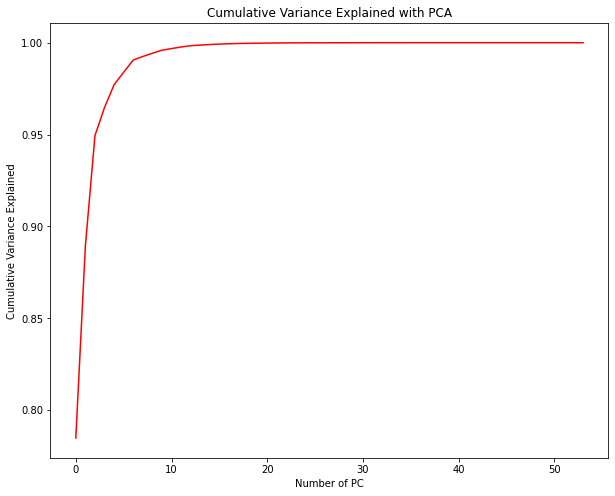

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
# from sklearn.preprocessing import imputer

from sklearn.pipeline import Pipeline

train = fires_1_copy
test = firestst_1_copy

from sklearn.impute import SimpleImputer


pipeline = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ('pca', PCA())])

train_pca = pipeline.fit_transform(train)

# transform the testing data
test_pca = pipeline.transform(test)



# Extract the pca object
pca = pipeline.named_steps['pca']

# Plot the cumulative variance explained

plt.figure(figsize = (10, 8))
plt.plot(list(range(train.shape[1])), np.cumsum(pca.explained_variance_ratio_), 'r-')
plt.xlabel('Number of PC'); plt.ylabel('Cumulative Variance Explained');
plt.title('Cumulative Variance Explained with PCA');

We only need a few prinicipal components to account for the majority of variance in the data. We can use the first two principal components to visualize the entire dataset. We will color the datapoints by the value of the target to see if using two principal components clearly separates the classes.

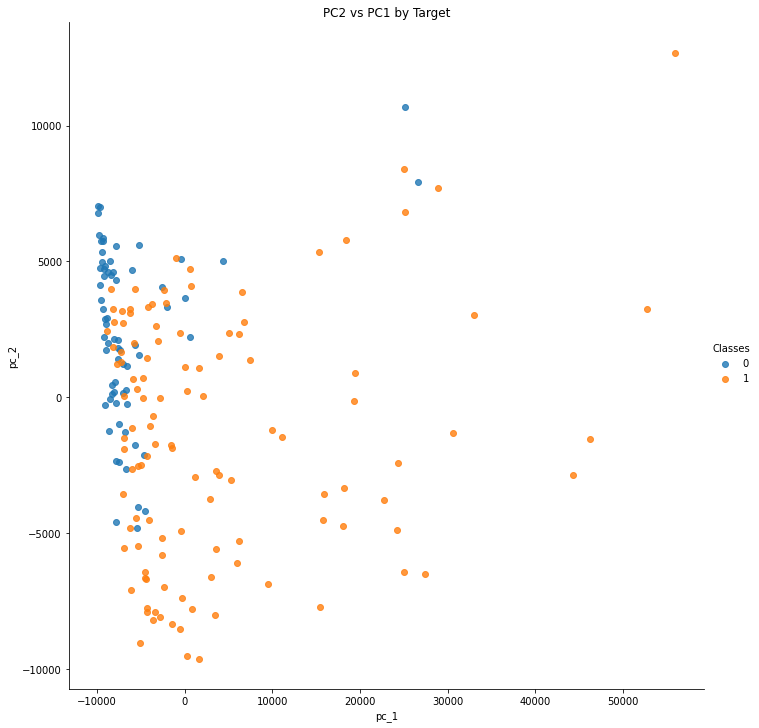

In [ ]:
# Dataframe of pca results
pca_df = pd.DataFrame({'pc_1': train_pca[:, 0], 'pc_2': train_pca[:, 1], 'Classes': fires_trainy})

# Plot pc2 vs pc1 colored by target
sns.lmplot('pc_1', 'pc_2', data = pca_df, hue = 'Classes', fit_reg=False, size = 10)
plt.title('PC2 vs PC1 by Target');

In [ ]:
print('2 principal components account for {:.4f}% of the variance.'.format(100 * np.sum(pca.explained_variance_ratio_[:2])))

2 principal components account for 88.9403% of the variance.


In [ ]:
X_train.head()

,Temperature,Ws,RH,Rain,FFMC,DMC,ISI,Temperature Ws,Temperature RH,Temperature FFMC,Ws RH,Ws FFMC,RH FFMC,Rain DC,Rain ISI
0,30.614061,25.719072,41.152445,-0.278088,90.632753,26.054055,8.196871,787.365229,1259.843457,2774.636625,1058.402683,2330.990276,3729.759379,-31.677391,-2.279450
1,29.434550,14.404154,80.747015,0.870042,71.296023,4.858151,1.748678,423.979789,2376.752025,2098.566336,1163.092438,1026.958896,5756.941008,14.512166,1.521423
2,38.858401,25.539684,51.423525,0.460537,68.862700,6.198851,0.945939,992.431269,1998.235923,2675.894396,1313.340572,1758.731608,3541.162786,-0.371735,0.435640
3,33.409604,6.968208,75.956595,-0.192492,118.606879,12.956825,5.779215,232.805076,2537.679776,3962.608892,529.281364,826.477422,9008.974701,-6.109941,-1.112454
4,27.991315,11.629124,80.801387,-0.166932,103.987784,4.217710,6.639114,325.514485,2261.737083,2910.754835,939.649379,1209.286876,8402.357189,-4.740398,-1.108279
